<a href="https://colab.research.google.com/github/ritamghoshritam/MachineLearningDemo/blob/main/WeatherPrediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Run only once
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#Run only once
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
#Run only once
fileDownloaded = drive.CreateFile({'id':'1d79jf8vv1UlBPV5s7Mf3QS2LVKPtEisR'})

In [ ]:
#Run only once
fileDownloaded.GetContentFile('weather1.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
dataset= pd.read_csv('weather1.csv')
print(dataset.shape)

(366, 22)


In [ ]:
print(dataset.head)

<bound method NDFrame.head of      MinTemp  MaxTemp  Rainfall  ...  RainToday  RISK_MM RainTomorrow
0        8.0     24.3       0.0  ...         No      3.6          Yes
1       14.0     26.9       3.6  ...        Yes      3.6          Yes
2       13.7     23.4       3.6  ...        Yes     39.8          Yes
3       13.3     15.5      39.8  ...        Yes      2.8          Yes
4        7.6     16.1       2.8  ...        Yes      0.0           No
..       ...      ...       ...  ...        ...      ...          ...
361      9.0     30.7       0.0  ...         No      0.0           No
362      7.1     28.4       0.0  ...         No      0.0           No
363     12.5     19.9       0.0  ...         No      0.0           No
364     12.5     26.9       0.0  ...         No      0.0           No
365     12.3     30.2       0.0  ...         No      0.0           No

[366 rows x 22 columns]>


In [ ]:
print(dataset.describe())

          MinTemp     MaxTemp    Rainfall  ...     Temp9am     Temp3pm     RISK_MM
count  366.000000  366.000000  366.000000  ...  366.000000  366.000000  366.000000
mean     7.265574   20.550273    1.428415  ...   12.358470   19.230874    1.428415
std      6.025800    6.690516    4.225800  ...    5.630832    6.640346    4.225800
min     -5.300000    7.600000    0.000000  ...    0.100000    5.100000    0.000000
25%      2.300000   15.025000    0.000000  ...    7.625000   14.150000    0.000000
50%      7.450000   19.650000    0.000000  ...   12.550000   18.550000    0.000000
75%     12.500000   25.500000    0.200000  ...   17.000000   24.000000    0.200000
max     20.900000   35.800000   39.800000  ...   24.700000   34.500000   39.800000

[8 rows x 17 columns]


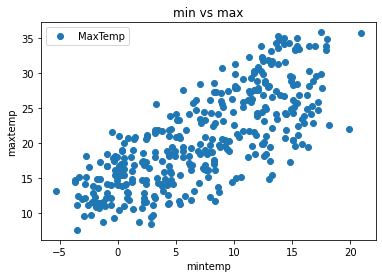

In [ ]:
dataset.plot(x='MinTemp', y='MaxTemp' , style='o')
plt.title('min vs max')
plt.xlabel('mintemp')
plt.ylabel('maxtemp')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


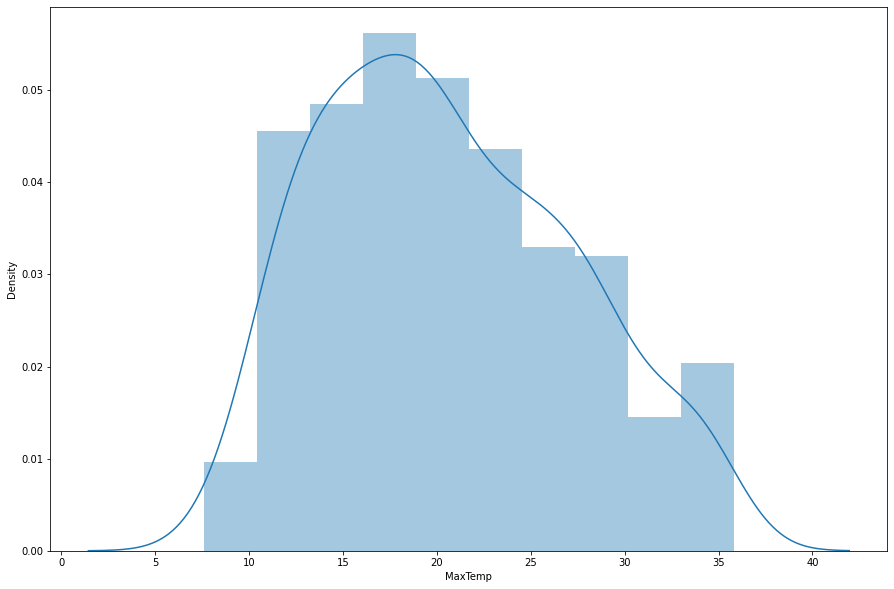

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.distplot(dataset['MaxTemp'])
plt.show()

In [ ]:
X= dataset['MinTemp'].values.reshape(-1,1)
y= dataset['MaxTemp'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [ ]:
model =LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept is :',model.intercept_)

Intercept is : [14.56498854]


In [ ]:
print('Coefficient is :' ,model.coef_)

Coefficient is : [[0.83637391]]


In [ ]:
y_pred= model.predict(X_test)

In [ ]:
score = model.score(X_train,y_train)
print("Accuracy is:", score, "%")

Accuracy is: 0.5538211963581995 %


In [ ]:
df=  pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

    Actual  Predicted
0     25.2  23.597827
1     11.5  13.059516
2     21.1  27.528784
3     22.2  25.688762
4     20.4  27.194235
..     ...        ...
87    14.8  15.568637
88     9.7  12.641329
89    12.5  17.157748
90    14.2  17.659572
91    18.5  25.270575

[92 rows x 2 columns]


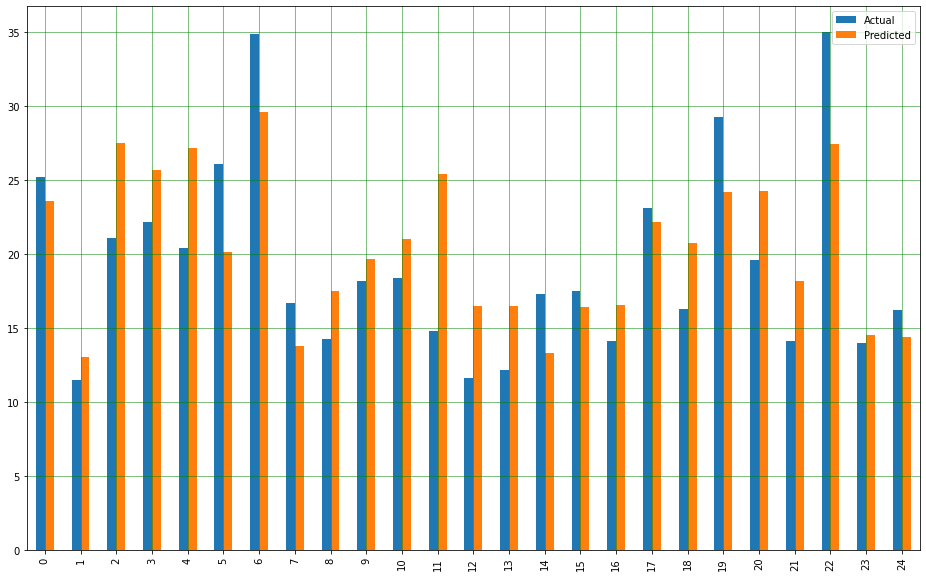

In [ ]:
df1= df.head(25)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5', color='black')
plt.show()



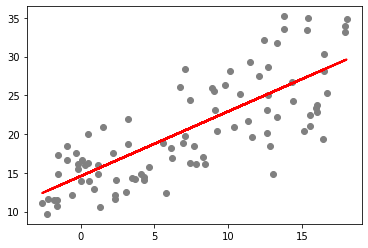

In [ ]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()


In [ ]:
print('Mean abolute error is:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error is:', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean abolute error is: 3.5720932501523985
Mean squared error is: 17.68167513150456
Root mean squared error is: 4.204958398308426
